## Taller de Procesamiento de Señales - TP3 Regresión Logística
### Alumno: Julián Stejman

--- 


a) 
1) Calcular la función inversa $\sigma^{-1}(p)$ con $p \in (0,1)$
2) Sea $p = \sigma(z)$ la función sigmoide, calcular la derivada $\sigma'(z)$ en términos de p.
3) Hallar una expresión analítica para la función costo y su gradiente. Tenga en cuenta el modelo asociado a una regresión logística de dos clases.

---

1) $$p = \sigma(z) = \frac{1}{1+e^{-z}}$$
$$
\frac{1}{p} = 1+e^{-z}
$$
$$
\frac{1}{p} -1= \frac{1-p}{p}=e^{-z}
$$
$$
log(\frac{1-p}{p}) = -z
$$
$$
\sigma^{-1}(p) = log(\frac{p}{1-p})
$$


2.  $$p'= \sigma'(z) = \left[ \frac{1}{1+e^{-z}}\right]' = \frac{e^{-z}}{(1+e^{-z})^2}$$
$$
= \frac{e^{-z}}{(1+e^{-z})^2} = \frac{1+ e^{-z} - 1}{(1+e^{-z})^2} = \frac{1+ e^{-z}}{(1+e^{-z})^2} - \frac{1}{(1+e^{-z})^2}
$$

$$
= \frac{1}{1+e^{-z}} - \frac{1}{(1+e^{-z})^2}
$$

$$
= \frac{1}{1+e^{-z}}\left[1- \frac{1}{1+e^{-z}} \right] = p(1-p)
$$

3. La función de costo que se utilizará es la Binary Cross-Entropy que tiene la siguiente forma:
$$
J(w,b) = -\frac{1}{N}\sum_{i=0}^N Y_i log(\sigma(\hat{Y_i})) + (1-Y_i)log(1-\sigma(\hat{Y_i}))
$$
$Y_i$ representa la etiqueta real de $X_i$ y la función $\sigma(\hat{Y_i})$ es análoga a la estimación de la probabilidad de $Y_i$ si uno considera que $\hat{Y}_i = w^TX_i + b$

Si se desea hallar $\nabla J(w,b)$ es equivalente a hacer:
$$
\nabla J(w,b) = -\frac{1}{N}\sum_{i=0}^N Y_i \nabla \left(log(\sigma(\hat{Y_i}))\right) + (1-Y_i)\nabla \left(log(1-\sigma(\hat{Y_i}))\right)
$$

Se busca entonces hallar esos gradientes:

 - $\nabla log(\sigma(\hat{Y_i})) = (1-\sigma(\hat{Y_i}))\left[X_i\;\; 1\right]^T$
-  $\nabla log(1-\sigma(\hat{Y_i})) = -\sigma(\hat{Y_i})\left[X_i\;\; 1\right]^T$

Entonces se tiene finalmente que el gradiente tiene esta forma:

$$
\nabla J(w,b) = \frac{1}{N}\sum_{i=0}^N \left(\sigma(\hat{Y_i}) - Y_i\right)\left[X_i\;\; 1\right]^T
$$

In [1]:
import kagglehub
dogcat = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
from PIL import Image


cat_dir = os.path.join(dogcat, "PetImages", "Cat")
dog_dir = os.path.join(dogcat, "PetImages", "Dog")
target_size = (16, 16)
images = []
labels = []
for dir in [dog_dir, cat_dir]:
    for filename in os.listdir(dir):
        if filename.endswith(".jpg"):
            img_path = os.path.join(dir, filename)
            try:
                img = Image.open(img_path)
            except (IOError, OSError) as e:
                continue
            img = img.resize(target_size)
            if dir == cat_dir:
                images.append(img)
                labels.append(0)
            elif dir == dog_dir:
                images.append(img)
                labels.append(1)


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [3]:
#convert all images to grayscale
images = [img.convert("L") for img in images]

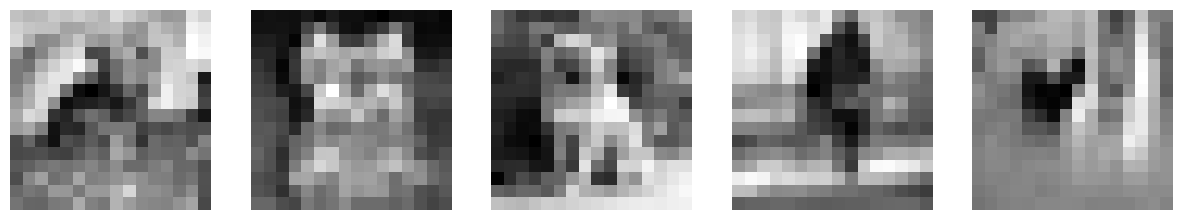

In [4]:
# mostrar 5 imagenes
import matplotlib.pyplot as plt
imagenes = [images[0], images[10], images[20], images[50], images[4]]
fig, axs = plt.subplots(1, 5, figsize=(15, 15))
for i, img in enumerate(imagenes):
    axs[i].imshow(img, cmap="gray")
    axs[i].axis("off")
plt.show()
print()

In [5]:
# Separo en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2)

In [6]:
from sklearn.linear_model import LogisticRegression
train_images_flattened = [list(img.getdata()) for img in train_images]
test_images_flattened = [list(img.getdata()) for img in test_images]

# Entrenar el modelo
reglog = LogisticRegression(max_iter=10000, penalty = None).fit(train_images_flattened, train_labels)


In [7]:
# Implementar una función que permita calcular la precisión del modelo
def accuracy(model, test_images, test_labels):
    correct = 0
    for img, label in zip(test_images, test_labels):
        prediction = model.predict([img])
        if prediction == label:
            correct += 1
    return correct / len(test_labels)
# Calculo la precisión del modelo
print(f"Precisión del modelo: {accuracy(reglog, train_images_flattened, train_labels) * 100:.2f}%")
print(f"Precisión del modelo: {accuracy(reglog, test_images_flattened, test_labels) * 100:.2f}%")



Precisión del modelo: 58.77%
Precisión del modelo: 56.06%


In [8]:
# Implementar una función que permita calcular la BCE a partir de la salida predict_log_proba del modelo
import numpy as np
def binary_cross_entropy(model, test_images, test_labels):
    log_proba = model.predict_log_proba(test_images)
    logp1 = log_proba[:, 1]
    logp0 = log_proba[:, 0]
    bce_loss = -np.mean(np.array(test_labels) * logp1 + (1 - np.array(test_labels)) * logp0)
    return bce_loss

# Calculate and print the BCE of the model
print(f"BCE del entrenamiento: {binary_cross_entropy(reglog, train_images_flattened, train_labels):.4f}")
print(f"BCE del testeo: {binary_cross_entropy(reglog, test_images_flattened, test_labels):.4f}")


BCE del entrenamiento: 0.6720
BCE del testeo: 0.6863


In [9]:
# Se busca clasificar la imagen del consejero
import requests
consejero = requests.get("https://raw.githubusercontent.com/mvera1412/TA136-TB056-TB057-8625/refs/heads/main/data/consejero.png", stream=True)
consejero_image = Image.open(consejero.raw)
# Preprocesamiento
consejero_image = consejero_image.resize(target_size)
consejero_image = consejero_image.convert("L")
consejero_image_flattened = list(consejero_image.getdata())
# Predicción
prediction = reglog.predict([consejero_image_flattened])
print(f"Predicción: {'Gato' if prediction == 0 else 'Perro'}")

Predicción: Perro


In [10]:
# crear un sklearn pipeline con features polinomicas y termine en una regresión logística
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Crear el pipeline
pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(max_iter=200, penalty = "l2", C=3))
])
# Entrenar el pipeline
pipeline.fit(train_images_flattened, train_labels)



c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(C=3, max_iter=200))])

In [11]:
# Calcular la precisión del pipeline
print(f"Precisión del modelo: {accuracy(pipeline, train_images_flattened, train_labels) * 100:.2f}%")
print(f"Precisión del modelo: {accuracy(pipeline, test_images_flattened, test_labels) * 100:.2f}%")


Precisión del modelo: 77.66%
Precisión del modelo: 64.42%


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18688\2202193221.py:10: RuntimeWarning: invalid value encountered in scalar divide
  tpr.append(tp / (tp + fn))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18688\2202193221.py:11: RuntimeWarning: invalid value encountered in scalar divide
  fpr.append(fp / (fp + tn))


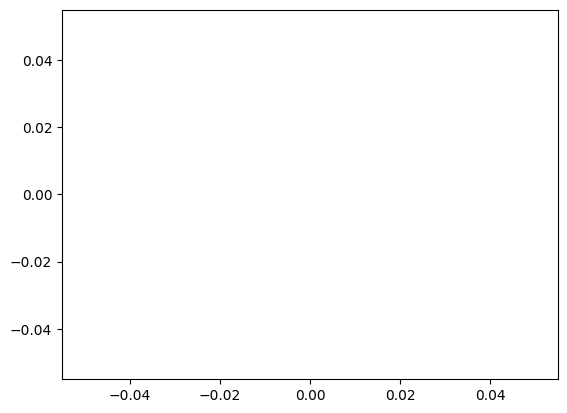

In [15]:
# quiero implementar la curva ROC utilizando el método predict_proba
def roc_curve(model, test_images, test_labels):
    proba = model.predict_proba(test_images)[:, 1]
    fpr, tpr, thresholds = [], [], []
    for threshold in np.arange(0, 1.01, 0.01):
        tp = sum((proba >= threshold) & (test_labels == 1))
        fp = sum((proba >= threshold) & (test_labels == 0))
        fn = sum((proba < threshold) & (test_labels == 1))
        tn = sum((proba < threshold) & (test_labels == 0))
        tpr.append(tp / (tp + fn))
        fpr.append(fp / (fp + tn))
        thresholds.append(threshold)
    return fpr, tpr, thresholds
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(pipeline, test_images_flattened, test_labels)
# Graficar la curva ROC
plt.plot(fpr, tpr)
plt.show()